# Unemployment Analysis at the U.S. National Level

by A.Narag |
February 15, 2023

In [66]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import os
import csv
import scipy.stats as st
from scipy.stats import linregress

Get the Unemployment Rates from the CSV Outpile created by the bls_api_merge_CSV Jupyter notebook

- Unemployment_Rates.csv
- Merged_Covid_CPI.csv

In [67]:
# Select the columns to include in the DataFrame from the Unemployment Rates CSV file
included_columns = ['Unnamed: 0', 'Unemployment Rate (S)', 'Unemployment Rate (U)', 'Women (S)','Men (S)', 'Part-Time Workers (S)', 'Full-Time Workers (S)']

# Open the csv file and create a DataFrame
unemployment_df = pd.read_csv('../output/Unemployment_Rates.csv', usecols=included_columns)

# Rename the Unnamed column to Date
unemployment_df = unemployment_df.rename(columns={'Unnamed: 0':'Date'})

# Change the Date data type to DateTime
unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date']).dt.normalize()

# Display the DataFrame
unemployment_df.head()

,Date,Unemployment Rate (S),Unemployment Rate (U),Women (S),Men (S),Part-Time Workers (S),Full-Time Workers (S)
0,2018-01-01,4.0,4.5,4.0,4.1,4.6,3.9
1,2018-02-01,4.1,4.4,4.1,4.0,4.6,4.0
2,2018-03-01,4.0,4.1,4.0,4.0,4.4,3.9
3,2018-04-01,4.0,3.7,3.9,4.1,4.2,3.9
4,2018-05-01,3.8,3.6,3.6,4.0,4.2,3.7


In [68]:
# check the data types
unemployment_df.dtypes

Date                     datetime64[ns]
Unemployment Rate (S)           float64
Unemployment Rate (U)           float64
Women (S)                       float64
Men (S)                         float64
Part-Time Workers (S)           float64
Full-Time Workers (S)           float64
dtype: object

Since the Merged_Covid_CPI.csv only has data from 2020, will take data from the CPIAUCSL.csv file on the 'resource' folder
This data will be merged into the Unemployment Rates

In [69]:
# Open the CPIAUCSL csv file and create a DataFrame
cpi_df = pd.read_csv('../resource/CPIAUCSL.csv')

# Rename the columns
cpi_df.columns = ['Date', 'CPI']

# Convert the Date into a DateTime format and CPI to float
cpi_df['Date'] = pd.to_datetime(cpi_df['Date']).dt.normalize()
cpi_df['CPI']  = cpi_df['CPI'].astype(float)

# Sort on Date and reset index
cpi_df = cpi_df.sort_values('Date', ascending=True)
cpi_df = cpi_df.reset_index(drop=True)

# Merge the unemployment_rates_time_df with cpi_df
unemployment_cpi_df = pd.merge(unemployment_df, cpi_df, on=['Date', 'Date'], how='left')

# Save the merged data into a new file
#unemployment_cpi_df.to_csv('../output/Merged_Unemployment_CPI.csv', index=False)

# Display results of merge
unemployment_cpi_df.head()

,Date,Unemployment Rate (S),Unemployment Rate (U),Women (S),Men (S),Part-Time Workers (S),Full-Time Workers (S),CPI
0,2018-01-01,4.0,4.5,4.0,4.1,4.6,3.9,248.743
1,2018-02-01,4.1,4.4,4.1,4.0,4.6,4.0,249.439
2,2018-03-01,4.0,4.1,4.0,4.0,4.4,3.9,249.581
3,2018-04-01,4.0,3.7,3.9,4.1,4.2,3.9,250.146
4,2018-05-01,3.8,3.6,3.6,4.0,4.2,3.7,250.779


In [70]:
# check the data types
unemployment_cpi_df.dtypes

Date                     datetime64[ns]
Unemployment Rate (S)           float64
Unemployment Rate (U)           float64
Women (S)                       float64
Men (S)                         float64
Part-Time Workers (S)           float64
Full-Time Workers (S)           float64
CPI                             float64
dtype: object

In [71]:
# Select the columns to include in the DataFrame from the Merged_Covid_CPI CSV file
included_columns2 = ['Date', 'Total']

# Open the csv file and create a DataFrame
covid_df = pd.read_csv('../output/Merged_Covid_CPI.csv', usecols=included_columns2)

# Rename Total to Covid19 Cases; Total is the total cases for all the states & territories included in the file
covid_df = covid_df.rename(columns={'Total':'Covid19 Cases'})

# Change the Date data type to DateTime
covid_df['Date'] = pd.to_datetime(covid_df['Date']).dt.normalize()

covid_df.head()

,Date,Covid19 Cases
0,2020-01-01,14.0
1,2020-02-01,35.0
2,2020-03-01,378228.0
3,2020-04-01,1744078.0
4,2020-05-01,1389120.0


In [72]:
# Merge the unemployment_cpi_df with covid_df
merged_df = pd.merge(unemployment_cpi_df, covid_df, on=['Date', 'Date'], how='left')

# For any values that did not convert (NaN value), replace with 0
merged_df = merged_df.fillna(0)

# Create a new column just for year
merged_df['Year'] = merged_df['Date'].dt.year

merged_df.tail()

,Date,Unemployment Rate (S),Unemployment Rate (U),Women (S),Men (S),Part-Time Workers (S),Full-Time Workers (S),CPI,Covid19 Cases,Year
55,2022-08-01,3.7,3.8,3.5,3.8,4.1,3.6,295.620,6264512.0,2022
56,2022-09-01,3.5,3.3,3.4,3.6,3.7,3.5,296.761,3601515.0,2022
57,2022-10-01,3.7,3.4,3.7,3.7,3.9,3.7,298.062,2214841.0,2022
58,2022-11-01,3.6,3.4,3.6,3.7,4.4,3.5,298.349,2587189.0,2022
59,2022-12-01,3.5,3.3,3.6,3.4,3.9,3.4,298.112,3838461.0,2022


# Calculate Statistics on the Unemployment Rates from 2018 to 2022

 - Use the Seasonally Adjusted Rates
 - Find if there are any outliers

In [73]:

# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(merged_df['Unemployment Rate (S)'])
print(f"The mean unemployment rate from 2018 to 2022 is {mean_numpy}")

median_numpy = np.median(merged_df['Unemployment Rate (S)'])
print(f"The median unemployment rate from 2018 to 2022 is {median_numpy}")

mode_scipy = st.mode(merged_df['Unemployment Rate (S)'])
print(f"The mode unemployment rate from 2018 to 2022 is {mode_scipy}")

# Calculate the min and max unemployment rates
max_rate = merged_df['Unemployment Rate (S)'].max()
print(f"The max unemployment rate from 2018 to 2022 is {max_rate}")

min_rate = merged_df['Unemployment Rate (S)'].min()
print(f"The max unemployment rate from 2018 to 2022 is {min_rate}")

The mean unemployment rate from 2018 to 2022 is 4.935000000000001
The median unemployment rate from 2018 to 2022 is 3.8499999999999996
The mode unemployment rate from 2018 to 2022 is ModeResult(mode=array([3.6]), count=array([10]))
The max unemployment rate from 2018 to 2022 is 14.7
The max unemployment rate from 2018 to 2022 is 3.5


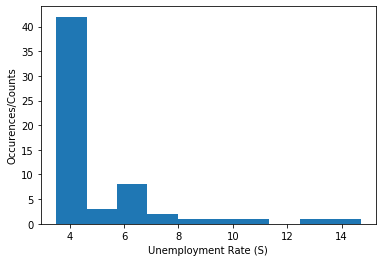

NormaltestResult(statistic=29.073683053750344, pvalue=4.861048347842828e-07)


In [74]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(merged_df['Unemployment Rate (S)'])
plt.xlabel('Unemployment Rate (S)')
plt.ylabel('Occurences/Counts')
plt.show()
print(st.normaltest(merged_df['Unemployment Rate (S)'].sample(25)))

In [75]:
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(merged_df['Unemployment Rate (S)'],ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(merged_df['Unemployment Rate (S)'],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 5.432608333333333
The population standard deviation using the NumPy module is 2.330795643837815


In [76]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

Roughly 68% of the data is between 2.604 and 7.266
Roughly 95% of the data is between 0.273 and 9.597
Roughly 99.7% of the data is between -2.057 and 11.927


In [77]:
# Demonstrate calculating the z-scores using SciPy
z_scipy = st.zscore(merged_df['Unemployment Rate (S)'])
print(f"The z-scores using the SciPy module are {z_scipy}")

The z-scores using the SciPy module are [-0.40115057 -0.35824677 -0.40115057 -0.40115057 -0.48695818 -0.40115057
 -0.48695818 -0.48695818 -0.52986198 -0.48695818 -0.48695818 -0.44405437
 -0.40115057 -0.48695818 -0.48695818 -0.57276579 -0.52986198 -0.57276579
 -0.52986198 -0.52986198 -0.61566959 -0.57276579 -0.57276579 -0.57276579
 -0.61566959 -0.61566959 -0.22953535  4.18955648  3.54599942  2.60211573
  2.25888529  1.48661682  1.2720978   0.84305975  0.75725214  0.75725214
  0.58563693  0.54273312  0.49982932  0.49982932  0.37111791  0.41402171
  0.19950269  0.11369508 -0.05792014 -0.18663155 -0.31534296 -0.44405437
 -0.40115057 -0.48695818 -0.57276579 -0.57276579 -0.57276579 -0.57276579
 -0.61566959 -0.52986198 -0.61566959 -0.52986198 -0.57276579 -0.61566959]


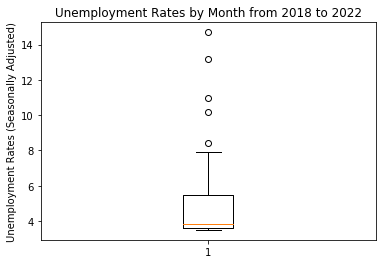

In [78]:
# Example outlier plot of reaction times
rates = [merged_df['Unemployment Rate (S)']]
# times = [96,98,100,105,95,100,101,102,97,98]
fig1, ax1 = plt.subplots()
ax1.set_title('Unemployment Rates by Month from 2018 to 2022')
ax1.set_ylabel('Unemployment Rates (Seasonally Adjusted)')
ax1.boxplot(rates)

# Save the figure
plt.savefig('../output/Unemployment_Rates_2018-2022_BoxPlot.png', dpi=300)

# Display plot
plt.show()

In [79]:
# Since the data is in a dataframe, use pandas to give quartile calculations
quartiles = merged_df['Unemployment Rate (S)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Unemployment Rates 2018 to 2022 is: {lowerq}")
print(f"The upper quartile of Unemployment Rates 2018 to 2022 is: {upperq}")
print(f"The interquartile range of Unemployment Rates 2018 to 2022 is: {iqr}")
print(f"The the median of Unemployment Rates 2018 to 2022 is: {quartiles[.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Unemployment Rates 2018 to 2022 is: 3.6
The upper quartile of Unemployment Rates 2018 to 2022 is: 5.500000000000001
The interquartile range of Unemployment Rates 2018 to 2022 is: 1.9000000000000008
The the median of Unemployment Rates 2018 to 2022 is: 3.8499999999999996 
Values below 0.7499999999999987 could be outliers.
Values above 8.350000000000001 could be outliers.


# Creating charts with the Unemployment Rates, CPI and Covid19 Case data

Plot the Unemployment Rates

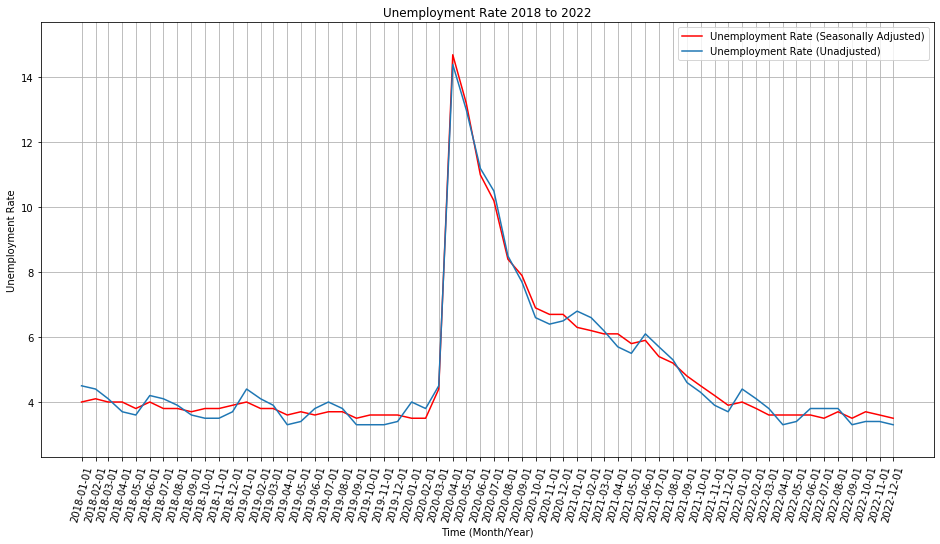

In [80]:
# Plot both Seasonally Adjusted (S) and Unadjusted (U) Unemployment Rates in the same chart

plt.figure(figsize=(16,8))

# Plot the first line chart
plt.plot(merged_df['Date'], merged_df['Unemployment Rate (S)'], label='Unemployment Rate (Seasonally Adjusted)', color='red')

# Plot the second line chart
plt.plot(merged_df['Date'], merged_df['Unemployment Rate (U)'], label='Unemployment Rate (Unadjusted)')

# Incorporate the other graph properties
plt.xlabel('Time (Month/Year)')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate 2018 to 2022')
plt.ylim(min(merged_df['Unemployment Rate (S)'].min(), merged_df['Unemployment Rate (U)'].min())-1, max(merged_df['Unemployment Rate (S)'].max(), merged_df['Unemployment Rate (U)'].max())+1)
plt.xticks(merged_df['Date'], rotation=75)
plt.grid()

# Add the legend
plt.legend()

# Save the figure
plt.savefig('../output/Unemployment_Seas_Unadj_2018-2022.png', dpi=300)

# Show the line plot
plt.show()



Key Observations:

- U.S. unemployment was at a low of 3.5% in February 2020 before a sharp increase to 14.7% in April 2020.
- There is consensus that the Covid19 pandemic had significant impact on the labor market leading to widespread job losses. 
- Throughout 2020, unemployment steadily declined from its peak to 6.7% in December 2020
- As of December 2022, unemployment is back to 3.5%

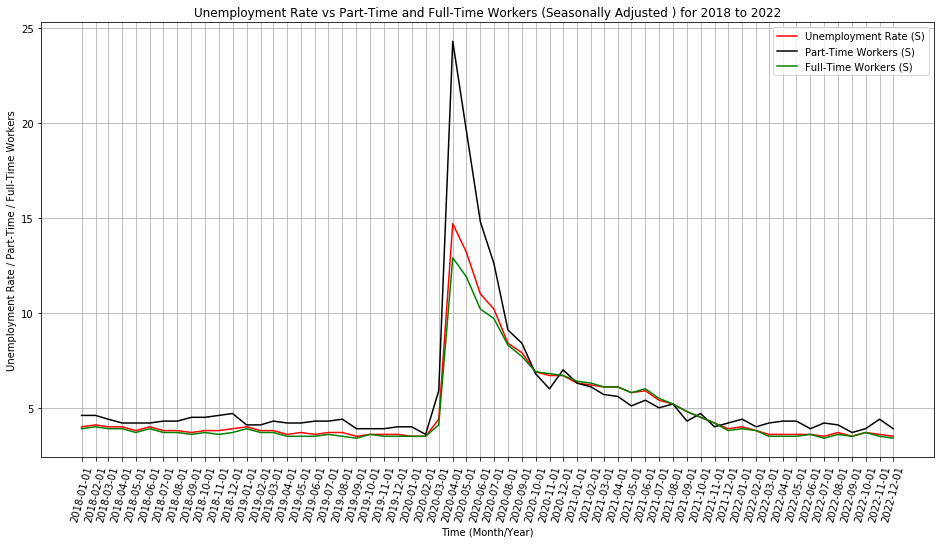

In [81]:
# Plot the Seasonally Adjusted (S) Unemployment Rate vs the Seasonally Adjusted (S) Part Time and Full Time

plt.figure(figsize=(16,8))

# Plot the first line chart
plt.plot(merged_df['Date'], merged_df['Unemployment Rate (S)'], label='Unemployment Rate (S)', color='red')

# Plot the second line chart
plt.plot(merged_df['Date'], merged_df['Part-Time Workers (S)'], label='Part-Time Workers (S)', color='black')

# Plot the third line chart
plt.plot(merged_df['Date'], merged_df['Full-Time Workers (S)'], label='Full-Time Workers (S)', color='green')

# Incorporate the other graph properties
plt.xlabel('Time (Month/Year)')
plt.ylabel('Unemployment Rate / Part-Time / Full-Time Workers')
plt.title('Unemployment Rate vs Part-Time and Full-Time Workers (Seasonally Adjusted ) for 2018 to 2022')
plt.ylim(min(merged_df['Unemployment Rate (S)'].min(), merged_df['Part-Time Workers (S)'].min(), merged_df['Full-Time Workers (S)'].min())-1, max(merged_df['Unemployment Rate (S)'].max(), merged_df['Part-Time Workers (S)'].max(), merged_df['Full-Time Workers (S)'].max())+1)
plt.xticks(merged_df['Date'], rotation=75)
plt.grid()

# Add the legend
plt.legend()

# Save the figure
plt.savefig('../output/Unemployment_Seas_Part&Fulltime_2018-2022.png', dpi=300)

# Show the line plot
plt.show()

Key Observations of Nat'l Unemployment vs. Part-Time Workers vs. Full-Time Workers:

- Part-Time workers were disproportionally impacted by the Covid19 shutdowns.  At the peak, the Part-Time workers unemployment rate was 24.3% compared to Full-Time workers at 12.9% and the national rate of 14.7%
- Part-time workers are often concentrated in industries that were heavily impacted by the shutdowns, such as retail, hospitality, and leisure.
- Part-time workers are less likely to have the option to work from home, as many part-time jobs are in industries that require in-person work.
- Part-time workers are vulnerable to lay-offs are and are more likely to be laid off during economic downturns, as businesses look to cut costs. 

<Figure size 1152x576 with 0 Axes>

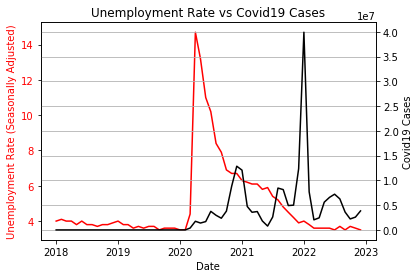

In [82]:
# Plot the Seasonally Adjusted (S) Unemployment Rate vs Covid19 Cases to see if there is actual correlation

plt.figure(figsize=(16,8))

# Ceate two line plots, Unemployment and Covid Cases, into a single chart using the subplot function 
fig, axis1 = plt.subplots()

# Plot Unemployment on the left y-axis
axis1.set_xlabel('Date')
axis1.set_ylabel('Unemployment Rate (Seasonally Adjusted)', color='red')
axis1.plot(merged_df['Date'], merged_df['Unemployment Rate (S)'], color='red')
axis1.tick_params(axis='y', labelcolor='red')

# Create a second axis shared with the first one, parallel to the original y-axis above
axis2 = axis1.twinx()

# Plot Covid on the right x-axis
axis2.set_ylabel('Covid19 Cases', color='black')
axis2.plot(merged_df['Date'], merged_df['Covid19 Cases'], color='black')
axis2.tick_params(axis='y', labelcolor='black')

# Incorporate the other graph properties
plt.grid()
plt.title('Unemployment Rate vs Covid19 Cases')

# Save the figure
plt.savefig('../output/Unemployment_vs_Covid19_2018-2022.png', dpi=300)

# Show the line plot
plt.show()

<Figure size 1152x576 with 0 Axes>

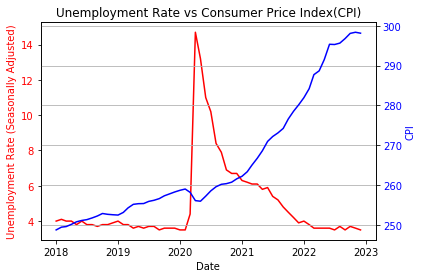

In [83]:
# Plot the Seasonally Adjusted (S) Unemployment Rate vs CPI to see if there is actual correlation

plt.figure(figsize=(16,8))

# Ceate two line plots, Unemployment and Covid Cases, into a single chart using the subplot function 
fig2, axis1 = plt.subplots()

# Plot Unemployment on the left y-axis
axis1.set_xlabel('Date')
axis1.set_ylabel('Unemployment Rate (Seasonally Adjusted)', color='red')
axis1.plot(merged_df['Date'], merged_df['Unemployment Rate (S)'], color='red')
axis1.tick_params(axis='y', labelcolor='red')

# Create a second axis shared with the first one, parallel to the original y-axis above
axis2 = axis1.twinx()

# Plot Covid on the right x-axis
axis2.set_ylabel('CPI', color='blue')
axis2.plot(merged_df['Date'], merged_df['CPI'], color='blue')
axis2.tick_params(axis='y', labelcolor='blue')

# Incorporate the other graph properties
plt.grid()
plt.title('Unemployment Rate vs Consumer Price Index(CPI)')

# Save the figure
plt.savefig('../output/Unemployment_vs_CPI_2018-2022.png', dpi=300)

# Show the line plot
plt.show()

# Finding Correlation between Unemployment, Covid19 Cases, CPI

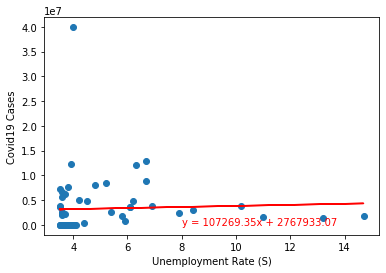

In [84]:
# Use scatter plot to plot Unemployment Rate and Covid19 Cases
x_val = merged_df['Unemployment Rate (S)']
y_val = merged_df['Covid19 Cases']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(8,10),fontsize=10,color="red")
plt.xlabel('Unemployment Rate (S)')
plt.ylabel('Covid19 Cases')
plt.show()


In [85]:
# Compute the Pearson correlation coefficient between Covid19 and Unemployment
correlation = st.pearsonr(merged_df['Unemployment Rate (S)'], merged_df['Covid19 Cases'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.04


 According an online article published by the Bureau of Labor Statistics on June 2021, "...[a] decade-long economic expansion ended early in 2020, as the coronavirus disease 2019 (COVID-19) pandemic and efforts to contain it led businesses to suspend operations or close, resulting in a record number of temporary layoffs. The pandemic also prevented many people from looking for work."  

However, based on the Pearson’s Correlation, a correlation coefficient of less than < 0.3 means there is no correlation or it is very weak. Therefore, simply comparing the number of Covid19 cases by itself to the Unemployment Rate is not enough to show correlation.  We must also look at other factors such as industry, state, number of remote workers, etc. to get an overall better picture of the cause of unemployment

BLS Article: https://www.bls.gov/opub/mlr/2021/article/unemployment-rises-in-2020-as-the-country-battles-the-covid-19-pandemic.htm#:~:text=A%20decade%2Dlong%20economic%20expansion,people%20from%20looking%20for%20work.

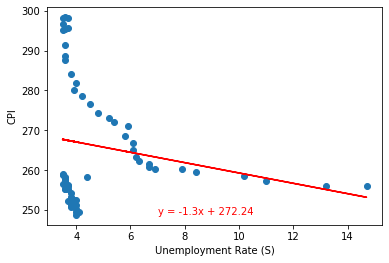

In [86]:
# Use scatter plot to plot Unemployment Rate and CPI

x_val2 = merged_df['Unemployment Rate (S)']
y_val2 = merged_df['CPI']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val2, y_val2)
regress_values2 = x_val2 * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val2, y_val2)
plt.plot(x_val2,regress_values2,"r-")
plt.annotate(line_eq2,(7,y_val2.min()),fontsize=10,color="red")
plt.xlabel('Unemployment Rate (S)')
plt.ylabel('CPI')
plt.show()

In [87]:
# Compute the Pearson correlation coefficient between CPIand Unemployment
correlation = st.pearsonr(merged_df['Unemployment Rate (S)'], merged_df['CPI'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.2


 According to Investopedia, "inflation and unemployment has traditionally been an inverse correlation" which is proven with a negative correlation number. However, similar story between Unemployment Rate and CPI, the number computed is still less than < 0.3 which means there is no correlation or it is very weak. Therefore, simply comparing the CPI number on its own to the Unemployment Rate is not enough to show correlation.  Investopedia delves deeper by analyzing the relationship between labor supply and demand - if there is small supply of labor, usually in-times of low unemployment rates, employers tend to bid up for employees by paying higher wages.  "Since wages and salaries are a major input cost for companies, rising wages should lead to higher prices for products and services in an economy, ultimately pushing the overall inflation rate higher" 

 However, the Covid19 pandemic skewed the type of jobs/workers that were unemployed and the industries impacted.  In another graph, we can see that part-time workers were disproportionally impacted by the Covid19 shutdowns.  